# Machine Learning and Statistics Project 2019

In [201]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss

import statsmodels.api as sm
from scipy.stats import norm

import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
from matplotlib import rcParams

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Nicely formatted plots
%matplotlib inline

# Load the Boston housing dataset from sklearn
from sklearn.datasets import load_boston
bhp = load_boston()
prices = bhp.target # Define the target values
features = bhp.data # Define the attribute values

#Store in DataFrame - Easier manipulation
attributes = bhp.feature_names # feature name(s)
data    = pd.DataFrame(features, columns = attributes)
target  = pd.DataFrame(prices, columns =['MEDV'])
boston  = pd.concat([data, target,], axis = 1) #concat data/target


## Explore the Data

In [219]:
# Key things to note is data, target, feature_names as I will use these during the project
print(bhp)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

***
<font color=blue>_Above I explored the dataset using <u>print(bhp)</u> but the output is not easy to interpret. In a real-world situation, offering this to clients or to an employer would not be professional. It can be easy for a person to lose interest or miss important aspects of the output. In the cell below I have outputted the same contents as above but in a structured and attractive way._</font>
***

In [227]:
print (bhp.DESCR)

print ("---------------------------------------------")
print ("Summary\n")
print ("Number of Houses          : ", houses)
print ("Number of Housing Features: ", features)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

***
<font color=blue>_Key things to note from the data set details above are :_ </font>
    1. The number of Instances and Attributes. 
    2. The column headings and what each column represents.
    3. Missing values?. I will check for this using a Python command to confirm.
    4. Creators.   
    5. Attribute 14(MEDV) will be the target
***

In [217]:
# Take a look at the data. I have specified three rows. If this is left empty the default will be five rows
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [220]:
# Checking the tail of a dataset can be useful to help check if data is currupted
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [228]:
# Statistical details of each column. How many rows, highest & lowest in each column etc
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [249]:
# Check for any null or missing values, data types etc.
print(boston.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB
None


## Statistical Analysis

By using the NumPy library I am able to calculate a few meaningful statistics about the dataset

In [231]:
# Number of houses
total_houses = data.shape[0]

# Number of features
total_features = data.shape[1]

# Max price
max_price = np.amax(prices)

# Minimum price
min_price = np.min(prices)

# Mean price
mean_price = np.mean(prices)

# Median price
median_price = np.median(prices)

# Standard deviation
std_dev = np.std(prices)

# Calculate and show statistics
print ("House prices in $1000's\n")
print ("Total houses       :", total_houses)
print ("Total features     :", total_features)
print ("Minimum price      : ${:.0f}".format(min_price))
print ("Maximum price      : ${:.0f}".format(max_price))
print ("Mean price         : ${:.2f}".format(mean_price))
print ("Median price       : ${:.2f}".format(median_price))
print ("Standard deviation : ${:.2f}".format(std_dev))

House prices in $1000's

Total houses       : 506
Total features     : 13
Minimum price      : $5
Maximum price      : $50
Mean price         : $22.53
Median price       : $21.20
Standard deviation : $9.19


[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015C55AB0550>


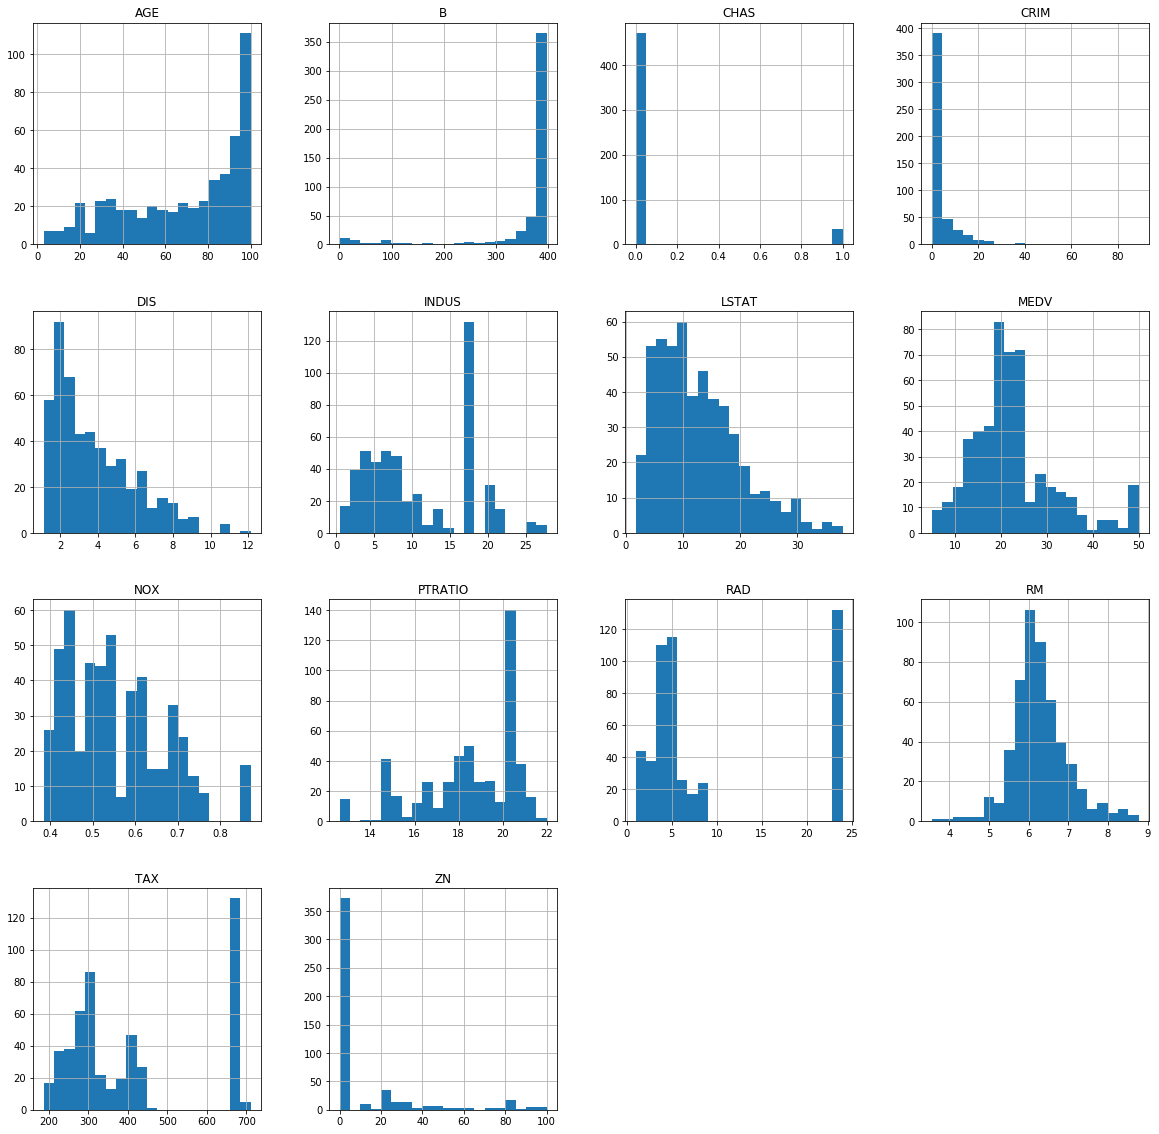

In [254]:
print(boston.hist(bins=20, figsize=(20, 20)))

The heatmap below is a very handy tool we can use to view the data in 2-dimensional form. A quick overview of the heatmap indicated that MEDV is strongly correlated to LSTAT

From the above correlation plot, we can see that MEDV is strongly correlated to LSTAT, RM
RAD and TAX are strongly correlated, so we don’t include this in our features together to avoid multicollinearity. Similar to the features DIS and AGE which have a correlation of -0.75. So we will exclude these four features from our features list.  You can find the reason behind this here.

AxesSubplot(0.125,0.125;0.62x0.755)


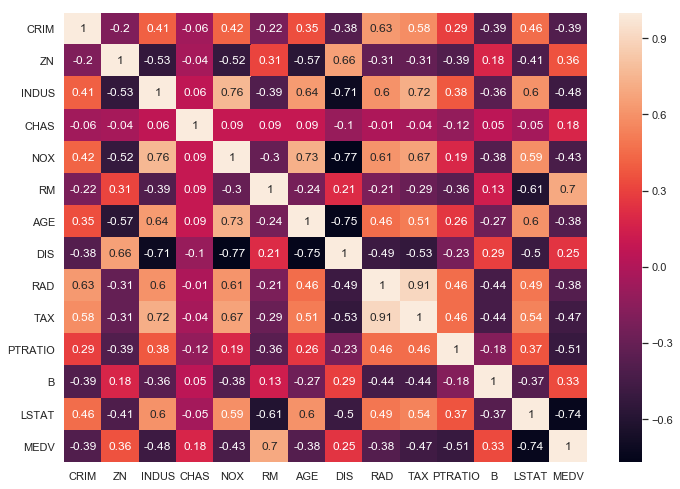

In [266]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
print(sns.heatmap(boston.corr().round(2), annot=True))



### Find total of houses that are along the Charles river and those that aren’t.

<font color=blue> _In this section I will analyse whether there is a difference in median house prices between houses that are along the Charles river and those that aren’t. I will use two columns to find the median price, the first column will be CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)) and the second column will be MEDV (Median value of owner-occupied homes in $1000's). I will also use statsmodels.api to output the OLS regression results._</font>

In [247]:
# Find total of houses that are along the Charles river and those that aren’t.

# Find houses either along the river
chas1=boston[boston['CHAS']==1]['MEDV']
# Pull columns for OLS model
x=boston[boston['CHAS']==1][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
y=boston[boston['CHAS']==1]['MEDV']


# Find houses either not along the river
chas0=boston[boston['CHAS']==0]['MEDV']
# Pull columns for OLS model
z=boston[boston['CHAS']==0][['RM', 'LSTAT', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
a=boston[boston['CHAS']==0]['MEDV']

#---------------------------------------------------------------------------------------------------------#
# Find the total number of house along the charles river
check1 = (boston.CHAS == 1).sum()

# Find the median of MEDV where CHAS == 1
medianMEDV1 = (boston.loc[boston["CHAS"] == 1]["MEDV"]).median()
print ("Total number of houses along the river is = ",(check1), ", and the median price along the river in $1000's : ${0:.2f}".format(medianMEDV1), "\n")

# OLS Regression for houses beside river
# Adapted from https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

#---------------------------------------------------------------------------------------------------------#

# Find the total number of house not along the charles river
check0 = (boston.CHAS != 1).sum()

# find and print the locations where CHAS = 0. Will edit this out for viewing reason 
check = (boston.loc[boston['CHAS'] != 1])
#print("Position numbers of these 0.0 results are : \n",(check.CHAS))

# Find the median of MEDV where CHAS == 0
medianMEDV0 = (boston.loc[boston["CHAS"] != 1]["MEDV"]).median()
print ("\n\n\nTotal number of houses not along the river is = ",(check0), ", and the median price not along the river in $1000's : ${0:.2f}".format(medianMEDV0),"\n")


# OLS Regression for houses not beside river
# Adapted from https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
model = sm.OLS(a, z).fit()
predictions = model.predict(z)
print(model.summary())

#---------------------------------------------------------------------------------------------------------#

Total number of houses along the river is =  35 , and the median price along the river in $1000's : $23.30 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.663e+28
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:44:15   Log-Likelihood:                 1005.2
No. Observations:                  35   AIC:                            -1992.
Df Residuals:                      26   BIC:                            -1978.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

<font color=blue> _From my findings I can see that the median house price along the river is $23300_</font>

In [194]:
# Generate Ttest based on if house is beside or not beside the river and MEDV
print(ss.ttest_ind(chas1, chas0))

# Generate Ttest based on if house is beside or not beside the river and MEDV
print(ss.stats.mannwhitneyu (chas1,chas0))




Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)
MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)


The t test is a measurement of whether the average (expected) value will differ significantly across the samples provided. A large p-value (greater than 0.05 or 0.1) then we cannot reject the null hypothesis. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

The result of the ttest I ran is 7.390623170519905e-05 or 0.00007390623170519905(real number). It is clear to see that the p-value is below 1 percent, this implies high significance we can reject the null hypothesis. 

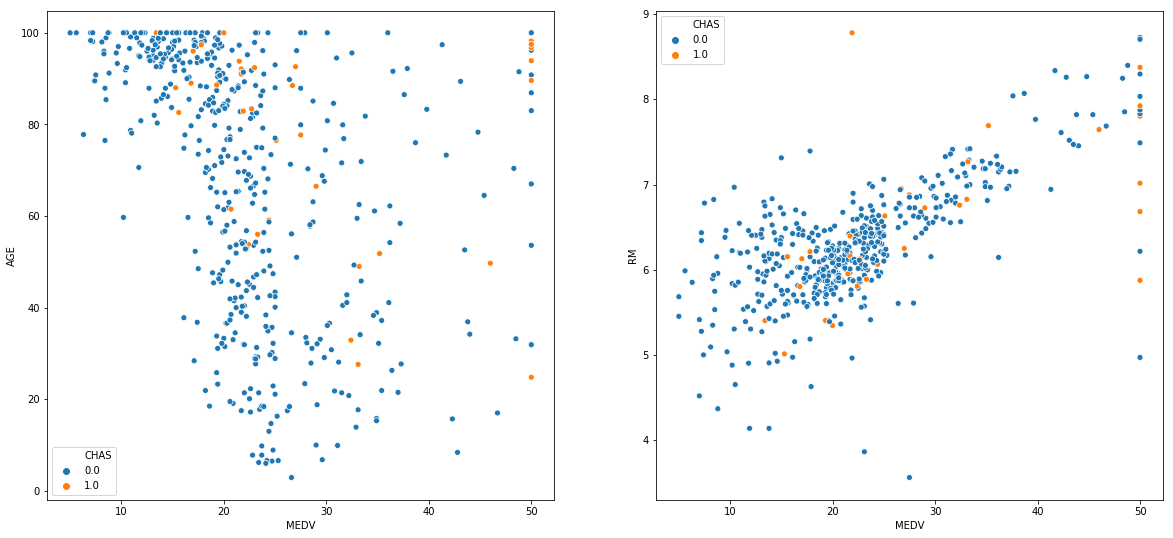

In [197]:
# ScatterPlot
colours = ["blue", "red"] # Define Plot Colours 
f, axes = plt.subplots(1, 2) # Allow me to generate graphs side by side
rcParams['figure.figsize'] = 20,9 # Set display size

# Do houses along and not along the river depend on age
sns.scatterplot(data=boston,x='MEDV',y='AGE', hue='CHAS', ax=axes[0])

# Do houses along and not along the river depend on room size
sns.scatterplot(data=boston,x='MEDV',y='RM', hue='CHAS', ax=axes[1])
plt.show()


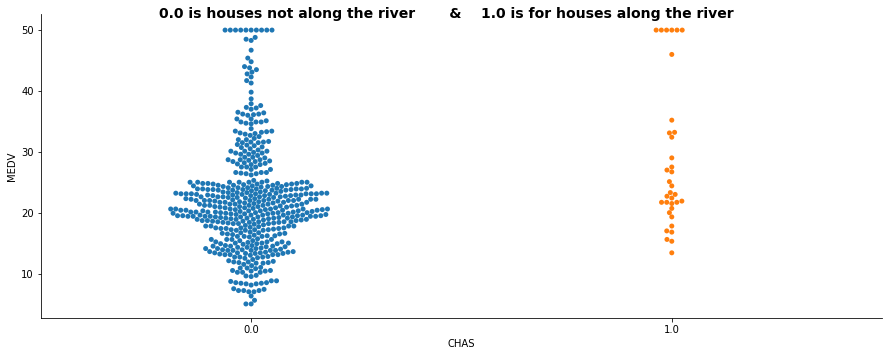

In [196]:
# Lets view the amount of houses that are either beside or not beside the river
colours = ["blue", "red"] # Define Plot Colours 

# Add kind. height and aspect to position accross the page
sns.catplot(x="CHAS", y="MEDV", data=boston, kind="swarm", height=5, aspect=2.5)
suptitle('0.0 is houses not along the river       &    1.0 is for houses along the river', fontsize=14, fontweight='bold')
plt.show()

A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables. These dots are plotted along the x-axis and y-axis. We use scatter plots when we want to reveal an association between two variables.

Above I have two scatterplots side by side. The first displays AGE along the y axis and MEDV _(Median value of owner-occupied homes in $1000's)_ along the x axis, the HUE that I have used is chas _(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))_. From this I am looking to see if age has any factor where people live or dont live beside the river. We can notice that the age factor with people living beside the river 

_From the data frame above I can see that there is a high correlation between RM and prices._

_I will use a scatter plot to view this relationship better._

_We can see that there is a positive correlation between RM and housing prices_

# Keras